# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | tavricheskoye
Processing Record 3 of Set 1 | wajima
Processing Record 4 of Set 1 | kochevo
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | coahuayana
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 15 of Set 1 | nim ka thana
City not found. Skipping...
Processing Record 16 of Set 1 | chepareria
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | bijie
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | hobart
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-17.83,95,100,7.50,GL,1681101003
1,tavricheskoye,54.5851,73.6395,4.95,48,31,7.44,RU,1681101004
2,wajima,37.4000,136.9000,17.38,41,20,9.77,JP,1681100565
3,kochevo,59.5994,54.3125,0.27,66,100,4.47,RU,1681101005
4,kapaa,22.0752,-159.3190,25.99,83,100,10.29,US,1681101006


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-17.83,95,100,7.50,GL,1681101003
1,tavricheskoye,54.5851,73.6395,4.95,48,31,7.44,RU,1681101004
2,wajima,37.4000,136.9000,17.38,41,20,9.77,JP,1681100565
3,kochevo,59.5994,54.3125,0.27,66,100,4.47,RU,1681101005
4,kapaa,22.0752,-159.3190,25.99,83,100,10.29,US,1681101006


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

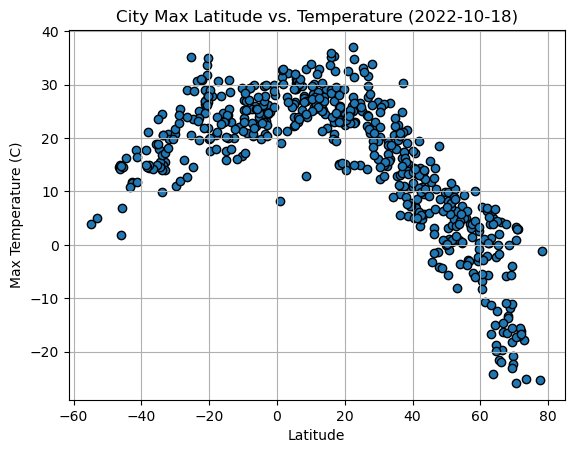

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values,y_values, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

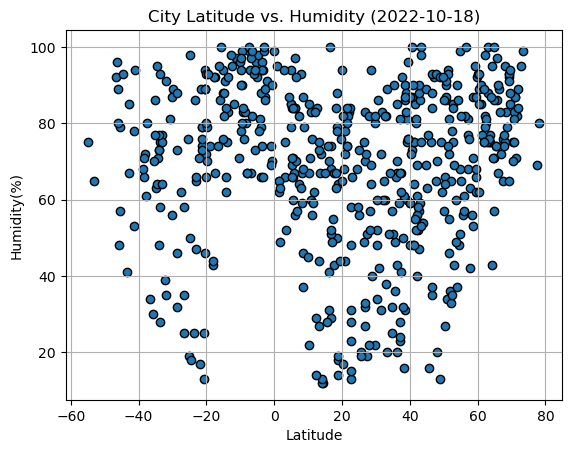

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values, marker="o", edgecolors='black')

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

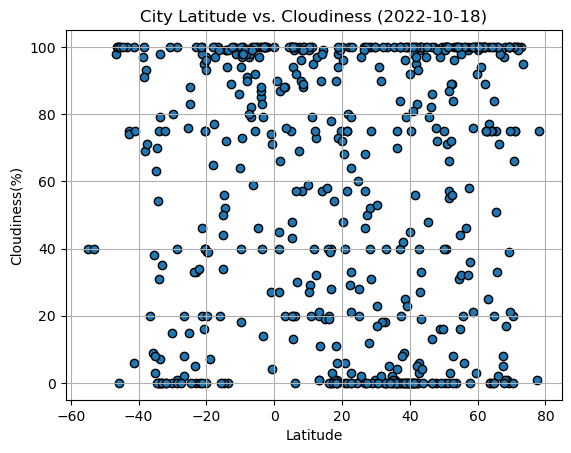

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

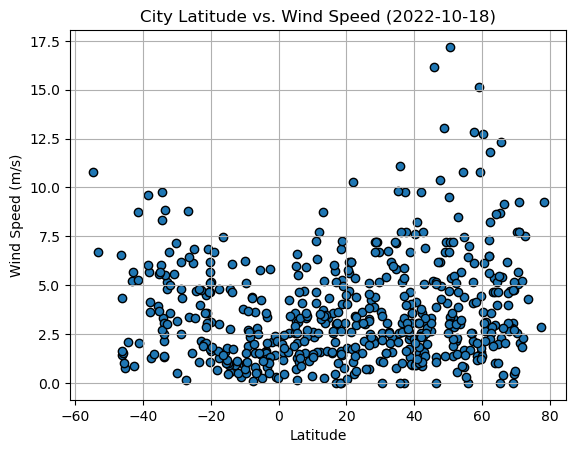

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
regress_values = (x_values*slope) + intercept 

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-17.83,95,100,7.50,GL,1681101003
1,tavricheskoye,54.5851,73.6395,4.95,48,31,7.44,RU,1681101004
2,wajima,37.4000,136.9000,17.38,41,20,9.77,JP,1681100565
3,kochevo,59.5994,54.3125,0.27,66,100,4.47,RU,1681101005
4,kapaa,22.0752,-159.3190,25.99,83,100,10.29,US,1681101006


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,chuy,-33.6971,-53.4616,17.28,93,0,2.17,UY,1681100813
6,busselton,-33.6500,115.3333,20.54,58,98,8.87,AU,1681101007
7,vaini,-21.2000,-175.2000,29.09,79,20,3.60,TO,1681101007
8,atuona,-9.8000,-139.0333,27.15,78,18,6.24,PF,1681101007
17,east london,-33.0153,27.9116,15.52,77,0,5.14,ZA,1681101011


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 2.8755916744220326e-129
y=-0.61x + 35.56


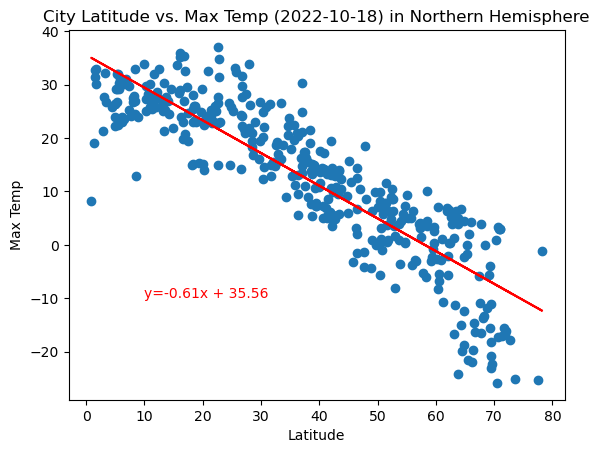

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (10,-10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (2022-10-18) in Northern Hemisphere")

plt.show()


The r-value is: 1.4156493390798252e-20
y=0.29x + 27.89


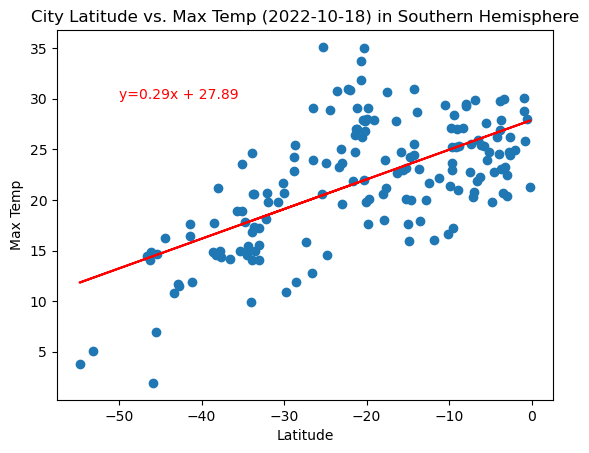

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (2022-10-18) in Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

- As latitude of cities increases going north the max temperature decreases accordingly. In this case, the extremely small rvalue indicates that there is a very strong negative correlation between the latitude and temperature in the linear regression model. Specifically, as the latitude increases, maximum temperature decreases at a very strong rate. 

- In the Southern hemisphere, there is a positive correlation between latitude and max temperature. As one moves closer to the equator the max temperature rises, and vise versa. The rvalue is extremely small and suggests there is a strong positive correlation between x and y values. 

The r-value is: 6.345376368443901e-08
y=0.29x + 55.68


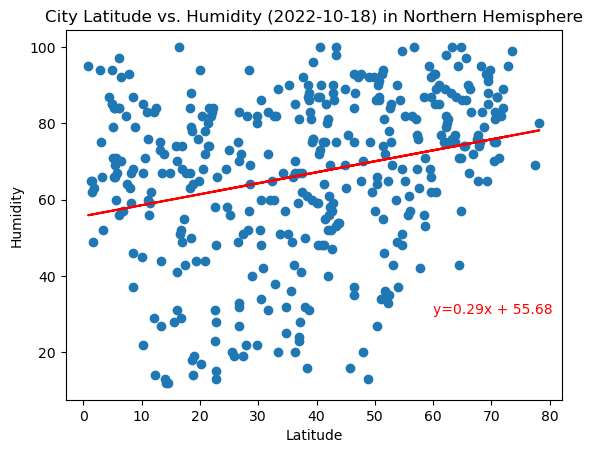

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (60,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18) in Northern Hemisphere")

plt.show()

The r-value is: 5.830015211700076e-06
y=0.52x + 85.85


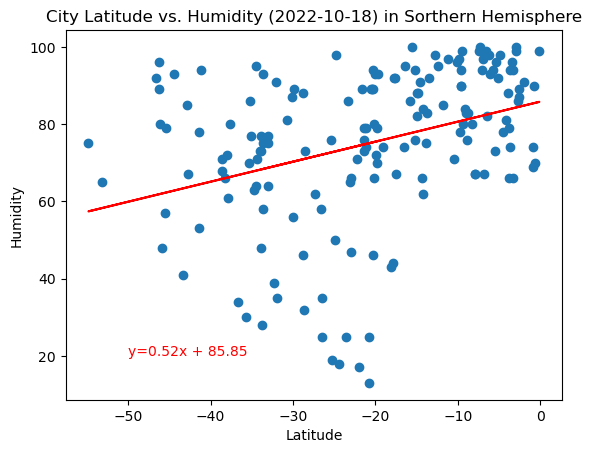

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,20), c="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18) in Sorthern Hemisphere")

plt.show()

**Discussion about the linear relationship:**

In the Northern hemisphere graph, it can be seen that there is a relatively strong positive correlation between latitude and humidity. As latitude increases traveling north, humidity also seems to increase. 

In the Southern hemisphere, the values seem a bit more dispersed compared to the measurements of the Northern hemisphere. However, there is a weak positive correlation between the two variables as reflected by the rvalue. The line of best fit also shows that as latitude goes closer to the equator humidity increases slightly more. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07699180685875968
y=0.18x + 48.42


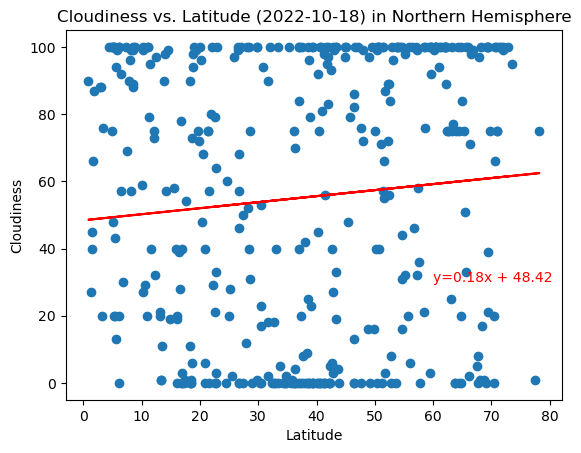

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (60,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (2022-10-18) in Northern Hemisphere")

plt.show()

The r-value is: 0.0007077753823878208
y=0.74x + 77.54


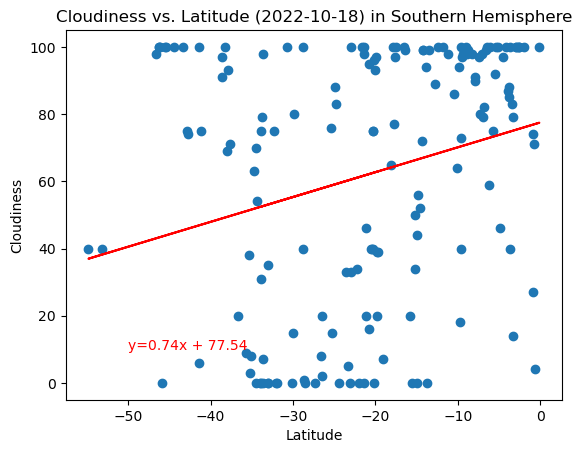

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (2022-10-18) in Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:**

Both graphs show a very weak positive correlation between latitude and cloudiness. Traveling north demonstrates a slight increase in cloudiness as seen in the line of best fit. However, much of data is dispersed and cloudiness may be affected by other variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 3.678041371393613e-05
y=0.03x + 2.71


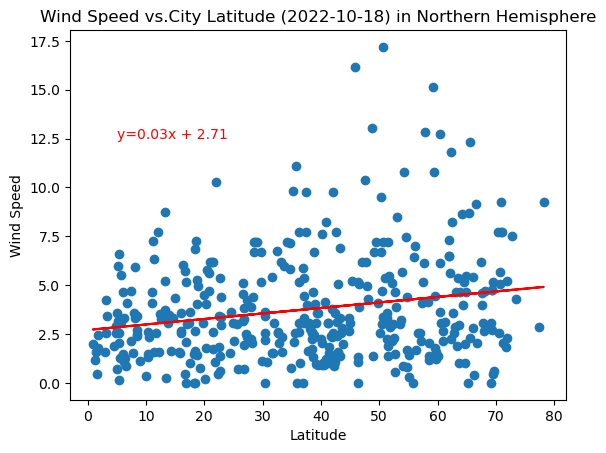

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (5,12.5), c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs.City Latitude (2022-10-18) in Northern Hemisphere")

plt.show()

The r-value is: 9.194681919939008e-09
y=-0.07x + 1.69


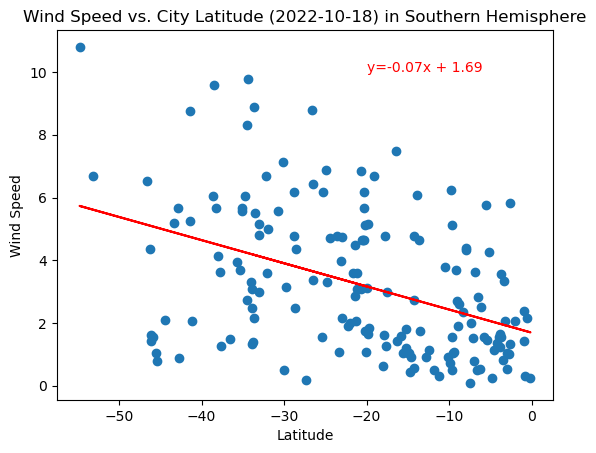

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-20,10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. City Latitude (2022-10-18) in Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** 

Wind speed in the northern and southern hemispheres are weakly affected by latitude. The r-value is very small and indicates a weak correlation between wind speed and latitude. In the north there is a weak positive correlation and in the south there is a weak negative correlation with latitude. 